In [36]:
# Import the modules
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

In [37]:
import pandas as pd
import codecs

with codecs.open("Resources/DataCoSupplyChainDataset.csv", 'r', encoding='ISO-8859-1') as f:
    DataCO_df = pd.read_csv(f)


DataCO_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


DATA CLEANING 

In [38]:
#show data type for each column
DataCO_df.dtypes

Type                              object
Days for shipping (real)           int64
Days for shipment (scheduled)      int64
Benefit per order                float64
Sales per customer               float64
Delivery Status                   object
Late_delivery_risk                 int64
Category Id                        int64
Category Name                     object
Customer City                     object
Customer Country                  object
Customer Email                    object
Customer Fname                    object
Customer Id                        int64
Customer Lname                    object
Customer Password                 object
Customer Segment                  object
Customer State                    object
Customer Street                   object
Customer Zipcode                 float64
Department Id                      int64
Department Name                   object
Latitude                         float64
Longitude                        float64
Market          

In [39]:
#extract date without time from column "order date (DateOrders)" and create a new column order_date_VL in DataCO_df

DataCO_df['order_date_VL'] = pd.to_datetime(DataCO_df['order date (DateOrders)']).dt.date
DataCO_df.head(3)



,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_date_VL
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,2018-01-31
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,2018-01-13
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,2018-01-13


In [40]:
#show basic statistics for the dataframe
#DataCO_df.describe()

LINEAR REGRESSION - Sales Prediction Total 

In [41]:
#remove rows with "Order Satus" = "CANCELED"
DataCO_df = DataCO_df[DataCO_df['Order Status'] != 'CANCELED']
DataCO_df.head(3)

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,order_date_VL
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class,2018-01-31
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,2018-01-13
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class,2018-01-13


In [42]:
#DataCO_df.columns

In [43]:
#create a new dataframe with "order_date_VL" as index and sum of "Sales per customer" for each day
sales_df = DataCO_df.groupby(['order_date_VL'])['Sales per customer'].sum().reset_index()

#add a column with number of orders per day which is the number of unique "Order ID" for each day
sales_df['order_volume_VL'] = DataCO_df.groupby(['order_date_VL'])['Order Id'].nunique().reset_index()['Order Id']

#change the column names "Sales per customer" to "sales_per_day_VL"
sales_df = sales_df.rename(columns={"Sales per customer": "sales_per_day_VL"})
#edit format for "order_date_VL" column to date data type withour time
sales_df['order_date_VL'] = pd.to_datetime(sales_df['order_date_VL']).dt.date

sales_df.head(5)


,order_date_VL,sales_per_day_VL,order_volume_VL
0,2015-01-01,28958.730381,57
1,2015-01-02,25948.820225,52
2,2015-01-03,32859.300341,60
3,2015-01-04,31869.500330,62
4,2015-01-05,27533.050215,57


In [44]:
#create additional column with month and year
sales_df['month_year_VL'] = pd.to_datetime(sales_df['order_date_VL']).dt.to_period('M')
sales_df.head(5)

,order_date_VL,sales_per_day_VL,order_volume_VL,month_year_VL
0,2015-01-01,28958.730381,57,2015-01
1,2015-01-02,25948.820225,52,2015-01
2,2015-01-03,32859.300341,60,2015-01
3,2015-01-04,31869.500330,62,2015-01
4,2015-01-05,27533.050215,57,2015-01


In [45]:
sales_df.dtypes

order_date_VL          object
sales_per_day_VL      float64
order_volume_VL         int64
month_year_VL       period[M]
dtype: object

In [46]:
# Create a new dataframe grouped by "month_year_VL" and calculate the sum for "sales_per_day_VL" and "order_volume_VL"
sales_month_df = sales_df.groupby(['month_year_VL'])[['sales_per_day_VL', 'order_volume_VL']].sum().reset_index()

# Rename the column "sales_per_day_VL" to "sales_month_VL"
sales_month_df.rename(columns = {'sales_per_day_VL':'sales_month_VL'}, inplace=True)

# Convert "sales_month_VL" values to integers to remove decimals
sales_month_df['sales_month_VL'] = sales_month_df['sales_month_VL'].astype(int)

sales_month_df.head(5)

,month_year_VL,sales_month_VL,order_volume_VL
0,2015-01,930735,1757
1,2015-02,811256,1544
2,2015-03,926008,1742
3,2015-04,889407,1671
4,2015-05,919795,1734


In [47]:
sales_df.columns

Index(['order_date_VL', 'sales_per_day_VL', 'order_volume_VL',
       'month_year_VL'],
      dtype='object')

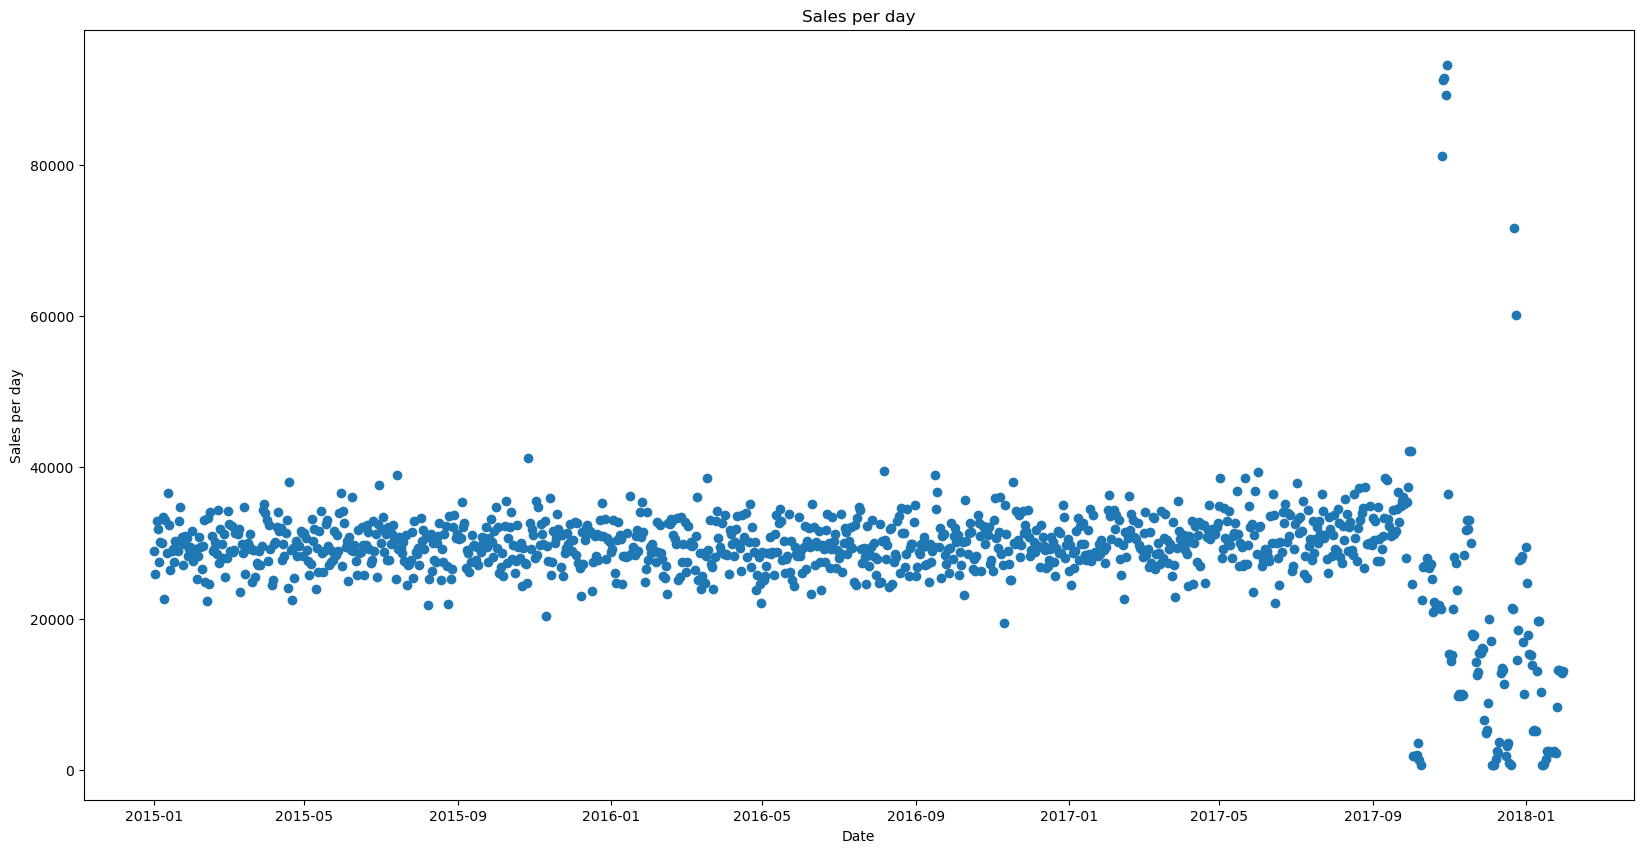

In [48]:
#plot the sales per day
plt.figure(figsize=(20,10))
plt.scatter(sales_df['order_date_VL'], sales_df['sales_per_day_VL'])
plt.xlabel('Date')
plt.ylabel('Sales per day')
plt.title('Sales per day')
plt.show()


Identified potential data issue after 2017-09 for daily sales analysis - 

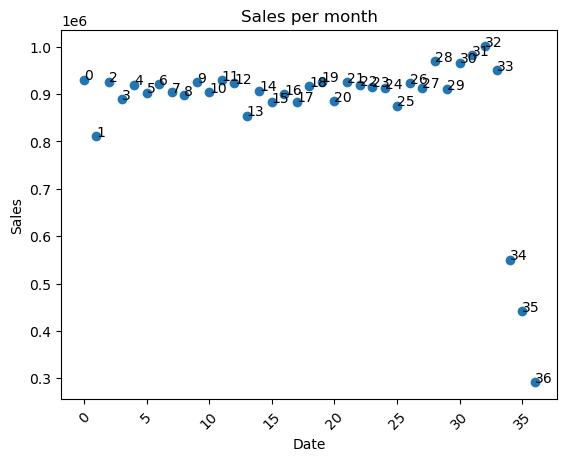

In [49]:
#plot the sales per month on a scatter plot by index
plt.scatter(sales_month_df.index, sales_month_df['sales_month_VL'])
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales per month')
#rotate the x-axis labels
plt.xticks(rotation=45)
#add labels with index numbers to the data points
for i in range(len(sales_month_df.index)):
    plt.annotate(i, (sales_month_df.index[i], sales_month_df['sales_month_VL'][i]))

plt.show()


Confirmed potential data collection issue going back to at least in 2017-11 [index=34 for monthly sales table] - sales after that period will be excluded from modeling for both monthly and daily sales model projection. 

In [50]:
#remove rows with month_year_VL index >=34 - possible data collection issue after this date - REFER TO THE SCATTERPLOT ABOVE
sales_month_df = sales_month_df[sales_month_df.index < 34]
sales_month_df.tail(5)


,month_year_VL,sales_month_VL,order_volume_VL
29,2017-06,910862,1649
30,2017-07,966172,1734
31,2017-08,981649,1738
32,2017-09,1000528,1679
33,2017-10,950735,2069


In [51]:
#remove rows from sales_df for dates after 2017-10-31
sales_df = sales_df[sales_df['order_date_VL'] < pd.to_datetime('2017-10-01').date()]
sales_df.tail(5)

,order_date_VL,sales_per_day_VL,order_volume_VL,month_year_VL
999,2017-09-26,35095.880340,57,2017-09
1000,2017-09-27,28064.610229,44,2017-09
1001,2017-09-28,35396.390255,56,2017-09
1002,2017-09-29,37348.870227,57,2017-09
1003,2017-09-30,42178.000117,59,2017-09


SALES per day - Linear Regression Model 

In [52]:
sales_df.columns

Index(['order_date_VL', 'sales_per_day_VL', 'order_volume_VL',
       'month_year_VL'],
      dtype='object')

In [53]:
#exclude dates with sales outside 3 standard deviations from the mean --> reduced MSE from 9,658,482 to 8,744,619 / improved R2 0.011 to 0.014
sales_df = sales_df[np.abs(sales_df.sales_per_day_VL-sales_df.sales_per_day_VL.mean()) <= (3*sales_df.sales_per_day_VL.std())]

In [54]:
# Splitting the data
X = sales_df.index.values.reshape(-1, 1)
y = sales_df.sales_per_day_VL.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [56]:
# Predictions
y_pred = model.predict(X_test)

In [57]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8744619.164935129


y = [1.74986179] * x + [29119.14630632]
R-squared: 0.014706182443297466


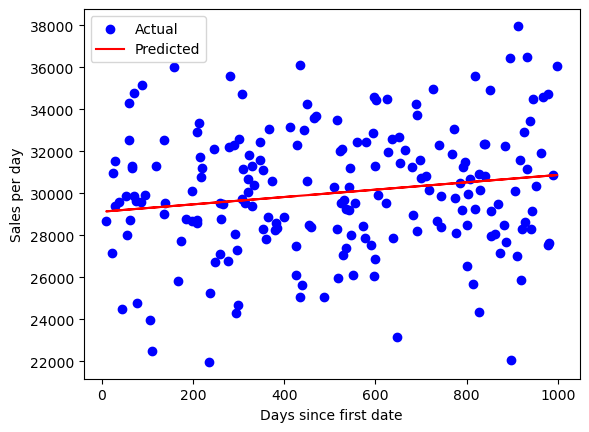

In [58]:
# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Days since first date')
plt.ylabel('Sales per day')
#print the equation of the line
print(f"y = {model.coef_[0]} * x + {model.intercept_}")
#print the R-squared value
print(f"R-squared: {model.score(X_test, y_test)}")
plt.legend()
plt.show()